 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Load-fully-connected-models-and-get-predictions-with-random-and-by-lon-validation-set" data-toc-modified-id="Load-fully-connected-models-and-get-predictions-with-random-and-by-lon-validation-set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load fully connected models and get predictions with random and by-lon validation set</a></span><ul class="toc-item"><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Load-model-trained-with-random-validation-set" data-toc-modified-id="Load-model-trained-with-random-validation-set-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load model trained with random validation set</a></span></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Get-predictions" data-toc-modified-id="Get-predictions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Get predictions</a></span></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Load-model-trained-with-by-lon-validation-set" data-toc-modified-id="Load-model-trained-with-by-lon-validation-set-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Load model trained with by-lon validation set</a></span></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Get-predictions" data-toc-modified-id="Get-predictions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Get predictions</a></span></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Dependence-of-R2-value-on-batch-size" data-toc-modified-id="Dependence-of-R2-value-on-batch-size-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Dependence of R2 value on batch size</a></span></li></ul></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Visualize-predictions" data-toc-modified-id="Visualize-predictions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualize predictions</a></span><ul class="toc-item"><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Visualize-some-predictions-of-the-randomly-trained-model" data-toc-modified-id="Visualize-some-predictions-of-the-randomly-trained-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualize some predictions of the randomly trained model</a></span></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#The-same-for-the-by-lon-model" data-toc-modified-id="The-same-for-the-by-lon-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The same for the by-lon model</a></span></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Some-spatial-visualization" data-toc-modified-id="Some-spatial-visualization-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Some spatial visualization</a></span><ul class="toc-item"><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#X-Y-Slices" data-toc-modified-id="X-Y-Slices-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>X-Y Slices</a></span></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Y-Z-slices" data-toc-modified-id="Y-Z-slices-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Y-Z slices</a></span></li></ul></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Trying-to-find-biases" data-toc-modified-id="Trying-to-find-biases-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Trying to find biases</a></span><ul class="toc-item"><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#X-Y-biases" data-toc-modified-id="X-Y-biases-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>X-Y biases</a></span></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#X-Z-biases" data-toc-modified-id="X-Z-biases-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>X-Z biases</a></span></li></ul></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#An-attempt-to-check-whether-the-neural-net-is-doing-reasonable-things" data-toc-modified-id="An-attempt-to-check-whether-the-neural-net-is-doing-reasonable-things-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>An attempt to check whether the neural net is doing reasonable things</a></span></li></ul></li><li><span><a href="http://localhost:8887/notebooks/keras/diagnostics_and_visualization.ipynb#Low-level-implementation-of-network-in-Python-and-then-Fortran" data-toc-modified-id="Low-level-implementation-of-network-in-Python-and-then-Fortran-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Low level implementation of network in Python and then Fortran</a></span></li></ul></div>

# Neural net parameterization - Diagnostics and visualization

In this notebook, we will look at the outputs of a simple fully connected neural net.

ToDo:
- low level implementation in python
- then in fortran

## Setup

Basic imports and path definitions. The data loading, keras models and other utility functions are imported from scripts in this directory. I am running this interactively on a 4GB GPU. Note that the CPU RAM might need to be bigger due to the large data sets.

There is an Anaconda environment file called `conda_env.yml` in this directory with all the packages I have installed (not all of them are needed probably).

In [1]:
# Imports 
from importlib import reload
import utils; reload(utils); from utils import *
import data_generator; reload(data_generator); from data_generator import *
import models; reload(models); from models import *

Using TensorFlow backend.


In [2]:
# Limit Tensorflow GPU memory usage. 
# Note that it's not possible to change the allocation or release memory again.
config = tf.ConfigProto()
config.gpu_options.allow_growth = True   # Allocates as much memory as needed.
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

In [3]:
# Plotting setup
%matplotlib inline
np.random.seed(42)
sns.set_style('dark')
sns.set_palette('deep')
sns.set_context('talk')
plt.rcParams["figure.figsize"] = (10,7)

In [4]:
# Define data paths
data_dir = '/project/meteo/w2w/A6/S.Rasp/SP-CAM/preprocessed_data/detailed_files/' # Full dataset
%ls $data_dir

SPCAM_mean_detailed.nc              SPCAM_outputs_train_by_lon_flat.nc
SPCAM_outputs_detailed.nc           SPCAM_outputs_train_by_lon.nc
SPCAM_outputs_flat.nc               SPCAM_outputs_valid_by_lon_flat.nc
SPCAM_outputs_flat_train_random.nc  SPCAM_outputs_valid_by_lon.nc
SPCAM_outputs_flat_valid_random.nc  SPCAM_std_detailed.nc


In [5]:
# Define a dictionary containing the feature and target variables
# and the number of dimensions
feature_vars = OrderedDict({
    'TAP': 2,             # Temperature [z, sample]
    'QAP': 2,             # Specific humidity [z, sample]
    'OMEGA': 2,           # [z, sample]
    'dTdt_adiabatic': 2,  # [z, sample]
    'dQdt_adiabatic': 2,  # [z, sample]
    'QRL': 2,             # Long wave heating rate [z, sample]
    'QRS': 2,             # Short wave heating rate [z, sample]
    'SHFLX': 1,           # [sample]
    'LHFLX': 1,           # [sample]
    'LAT': 1,             # Latitude [sample]
})
target_vars = OrderedDict({
    'SPDT': 2,            # SP temperature tendency [z, sample]
    'SPDQ': 2,            # SP humidity tendency [z, sample]
})

## Load fully connected models and get predictions with random and by-lon validation set 

Since the training of the networks takes quite a while, I ran several experiments outside this notebook using the `run_experimet.py` script. The models are defined in `models.py`. The summary of those can be found the `exp_list.md` file in this directory. For the purpose of this notebook I am going to use the best network with [1024, 1024, 512, 512] hidden nodes. This network has around 2 million parameters however. I am not sure how practical that would be in a climate model.

Training the models took around 2-3 hours on a single GPU with a batch size of 512.

### Load model trained with random validation set 

The model `fc_1024_1024_512_512_rand` got a training loss of 0.0138 and a validation loss of 0.0141. This indicates slight overfitting. The R2 I get for training is 0.68, but see the section of the batch_size dependence of R2 below!

In [7]:
# To load a model with custom loss functions we have to do some tinkering
from keras.utils.generic_utils import get_custom_objects
metrics_dict = dict([(f.__name__, f) for f in metrics])
get_custom_objects().update(metrics_dict)

In [21]:
model_rand = keras.models.load_model('./models/fc_1024_1024_512_512_rand.h5')

In [22]:
model_rand.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              154624    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 42)                21546     
Total params: 2,013,226
Trainable params: 2,013,226
Non-trainable params: 0
_________________________________________________________________


### Get predictions

In [23]:
# Load the dataset
valid_set_rand = DataSet(data_dir, 'SPCAM_outputs_flat_valid_random.nc', 'SPCAM_mean_detailed.nc',
                         'SPCAM_std_detailed.nc', feature_vars.keys(), flat_input=True)

In [24]:
# Quick sanity check whether we did things right
scores = model_rand.evaluate(valid_set_rand.features, valid_set_rand.targets, batch_size=1024)
print(metrics_dict.keys())
print(scores)

923648/924058 [============================>.] - ETA: 0sdict_keys(['rmse', 'log_loss', 'total_error', 'unexplained_error', 'rsquared', 'total_error_avgAx0', 'rsquared_avgAx0'])
[0.014136274131856851, 0.026018947627802092, -1.7679545781099926, 180.30689922304765, 62.86433449042994, 0.65098768612759439, 156.57238385172607, 0.59785215583922502]


In [25]:
# Get the model predictions
preds_rand = model_rand.predict(valid_set_rand.features, batch_size=1024)
preds_rand.shape

(924058, 42)

### Load model trained with by-lon validation set

This is the same model but trained with the data split by longitude. Here the training loss was 0.0137 and the validation loss 0.0145. This is a bigger discrepancy between the training and validation set compared to the random train/valid split. This indicates that randomly choosing points for the train/valid split might be "cheating" a little bit. With a bigger dataset in the future this problem should go away.

In [77]:
model_lon = keras.models.load_model('./models/fc_1024_1024_512_512_by_lon.h5')

### Get predictions

In [75]:
# Load the dataset
valid_set_lon = DataSet(data_dir, 'SPCAM_outputs_valid_by_lon_flat.nc', 'SPCAM_mean_detailed.nc',
                        'SPCAM_std_detailed.nc', feature_vars.keys(), flat_input=True)

In [95]:
# Quick sanity check whether we did things right
scores = model_lon.evaluate(valid_set_lon.features, valid_set_lon.targets, batch_size=1024)
print(metrics_dict.keys())
print(scores)

935936/938496 [============================>.] - ETA: 0sdict_keys(['rmse', 'log_loss', 'total_error', 'unexplained_error', 'rsquared', 'total_error_avgAx0', 'rsquared_avgAx0'])
[0.014474247668377458, 0.026541010744410398, -1.757283274098556, 179.94294379775926, 65.508903682914777, 0.65101182187637607, 153.02084924975705, 0.58541006867637158]


Note: The R2 and unexplained, total error do not agree with the Tensorboard scores, see next section.

In [78]:
# Get the model predictions
preds_lon = model_lon.predict(valid_set_lon.features, batch_size=1024)
preds_lon.shape

(938496, 42)

### Dependence of R2 value on batch size

I noticed that the scores for R2 above and in the Tensorboard log do not match up. After some testing I found that R2 is sensitive to the batch size. Here, I will try to illustrate this!

In [99]:
# Evaluate the model with bs = 128
model_lon.evaluate(valid_set_lon.features, valid_set_lon.targets, batch_size=128)[5]

936576/938496 [============================>.] - ETA: 0s

0.70164484791234094

In [98]:
# And with bs = 512
model_lon.evaluate(valid_set_lon.features, valid_set_lon.targets, batch_size=512)[5]

936448/938496 [============================>.] - ETA: 0s

0.68567435970998369

For a batch size of 1024 above we got a validation R2 of 0.651.

The scores are calculated by computing the `total_error`, which is the summed squared difference of the targets to the mean target in the batch, and the `unexplained_error`, which is the summed squared error of all points in the batch. Then, we compute 1 minus the ratio. This last part of the calculation is sensitive to the batch size because it makes a difference whether you compute the ratio of all batches and then take the mean or the other way around.

In [100]:
tot_bs = []
unex_bs = []
r2_bs = []
for bs in [128, 256, 512, 1024]:
    nb = int(np.floor(valid_set_lon.targets.shape[0] / bs))
    t = []
    u = []
    r = []
    for i in range(nb):   
        test_yt = valid_set_lon.targets[i*bs:(i+1)*bs, :]
        test_yp = preds_lon[i*bs:(i+1)*bs, :]
        # Here is the total_error
        t_tmp = np.sum(np.square(test_yt - np.mean(test_yt)))
        # And the unexplained error
        u_tmp = np.sum(np.square(test_yt - test_yp))
        t.append(t_tmp)
        u.append(u_tmp)
        # This is R2 for one batch
        r.append(1 - (u_tmp/t_tmp))
    # Now we take the mean of all batches
    r2_bs.append(np.mean(r))
    tot_bs.append(np.mean(t))
    unex_bs.append(np.mean(u))

In [101]:
tot_bs, unex_bs, r2_bs, 1-(np.array(unex_bs)/np.array(tot_bs))

([22.460178, 44.934689, 89.910698, 180.01913],
 [8.1891241, 16.378246, 32.756496, 65.540573],
 [0.70164484790217918,
  0.70036509239398836,
  0.68567435363326901,
  0.65092255339416871],
 array([ 0.63539362,  0.63550997,  0.63567746,  0.6359244 ], dtype=float32))

Our python results agree very closely with the keras evaluation above.

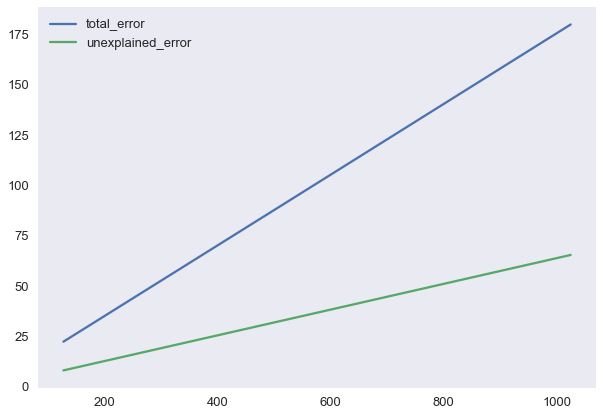

In [103]:
# Plot the total and unexplained error
plt.plot([128, 256, 512, 1024], tot_bs, label='total_error')
plt.plot([128, 256, 512, 1024], unex_bs, label='unexplained_error')
plt.legend(); plt.show()

The total and unexplained error scale linearly with the batch size. But...

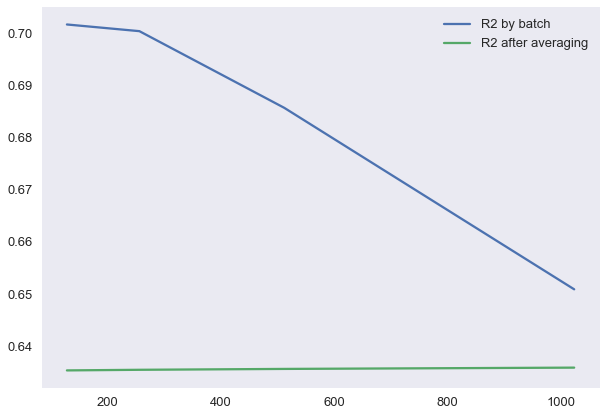

In [104]:
plt.plot([128, 256, 512, 1024], r2_bs, label='R2 by batch')
plt.plot([128, 256, 512, 1024], 1-(np.array(unex_bs)/np.array(tot_bs)), label='R2 after averaging')
plt.legend(); plt.show()

Here, you see how the batch-by-batch computation of R2 as done in the models depends on the batch_size. Larger batch_sizes give worse R2 values. The green line is the R2 computed from the averaged total and unexplained error.

For this reason, I think we should be careful using R2 to compare our models and focus on the other scores, such as the mean absolute error (loss) or the log_loss.

## Visualize predictions

Let's now check out the model predictions for the validation set and the true values.

### Visualize some predictions of the randomly trained model

For this we will use a (not yet documented) function from `utils.py`. Notice that the values plotted here are the normalized values.

In [105]:
valid_set_rand.feature_names

odict_keys(['TAP', 'QAP', 'OMEGA', 'dTdt_adiabatic', 'dQdt_adiabatic', 'QRL', 'QRS', 'SHFLX', 'LHFLX', 'LAT'])

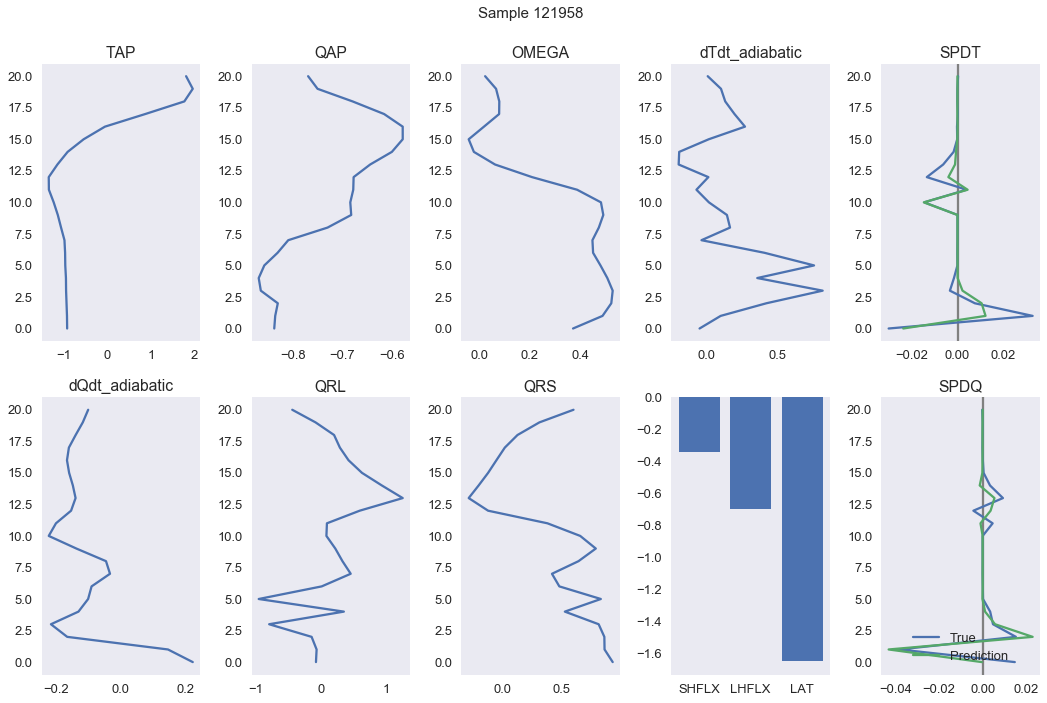

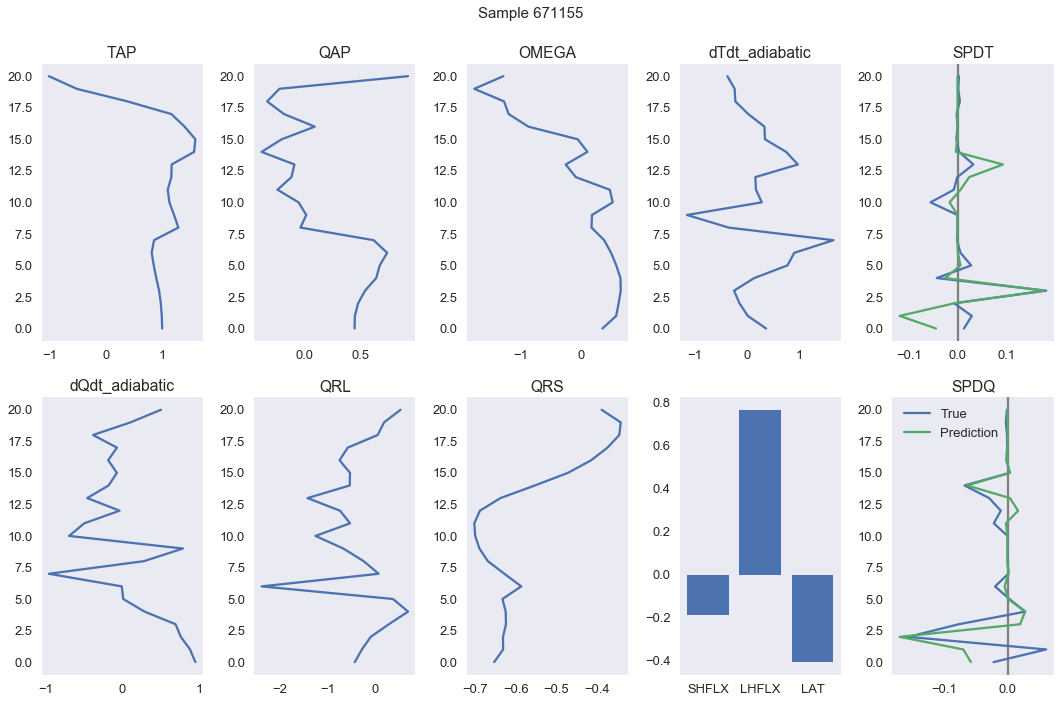

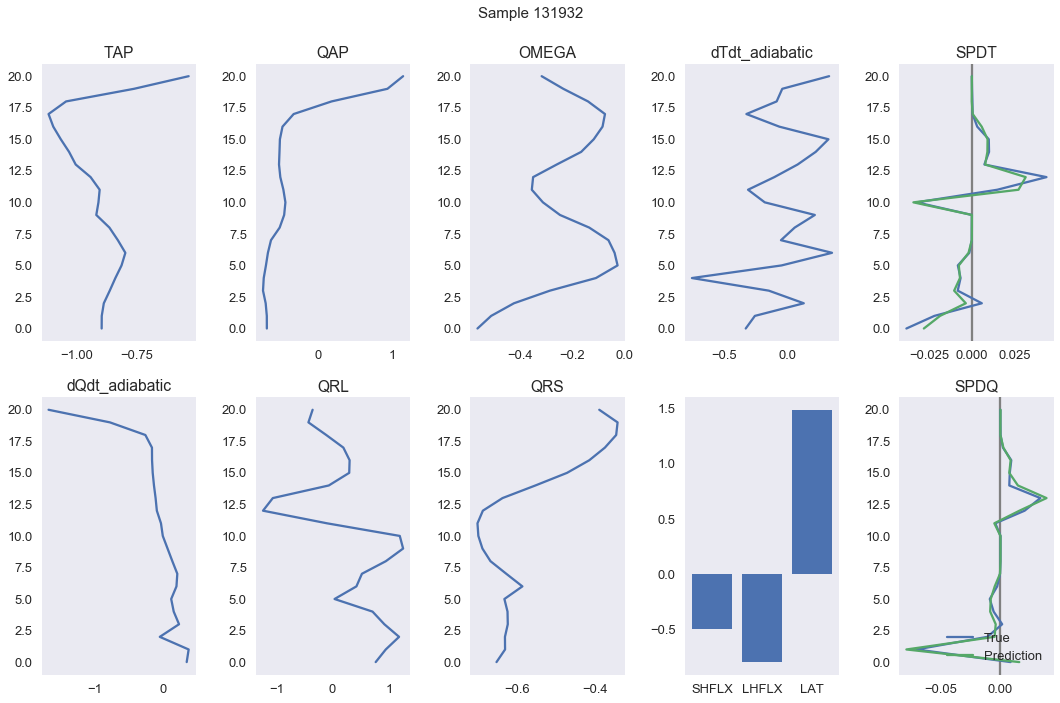

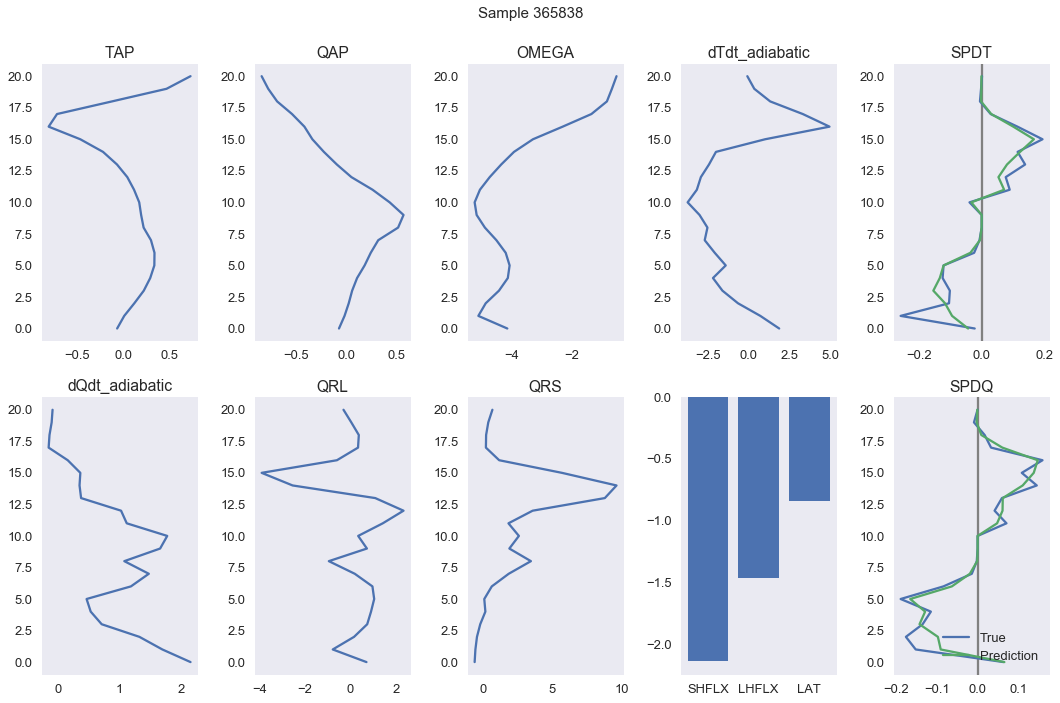

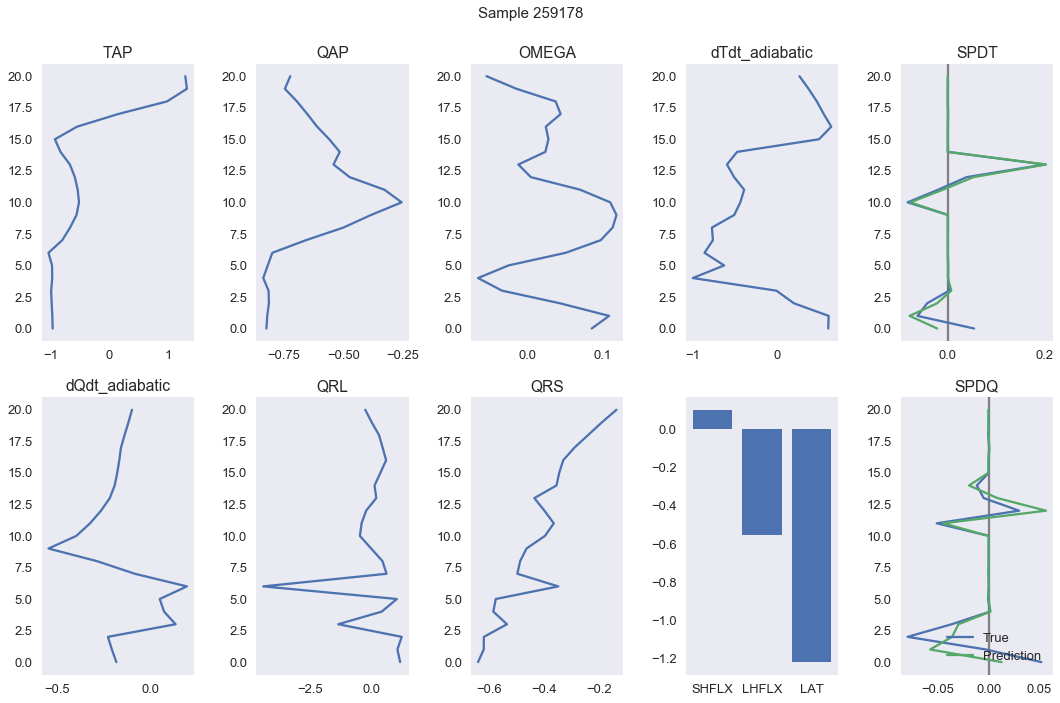

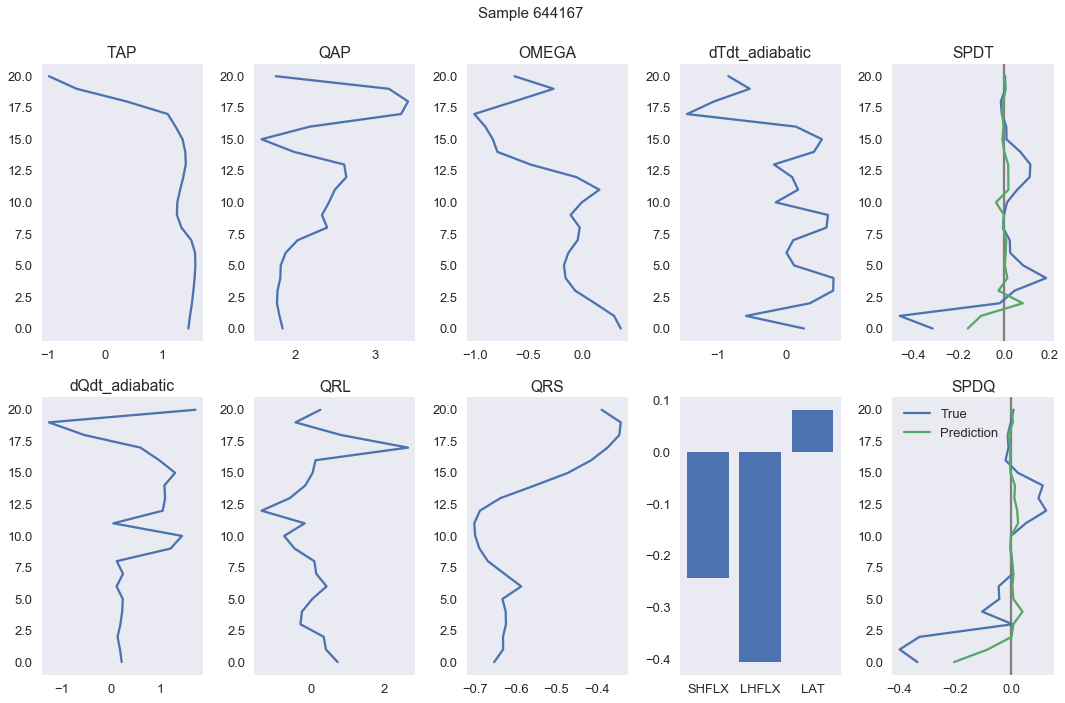

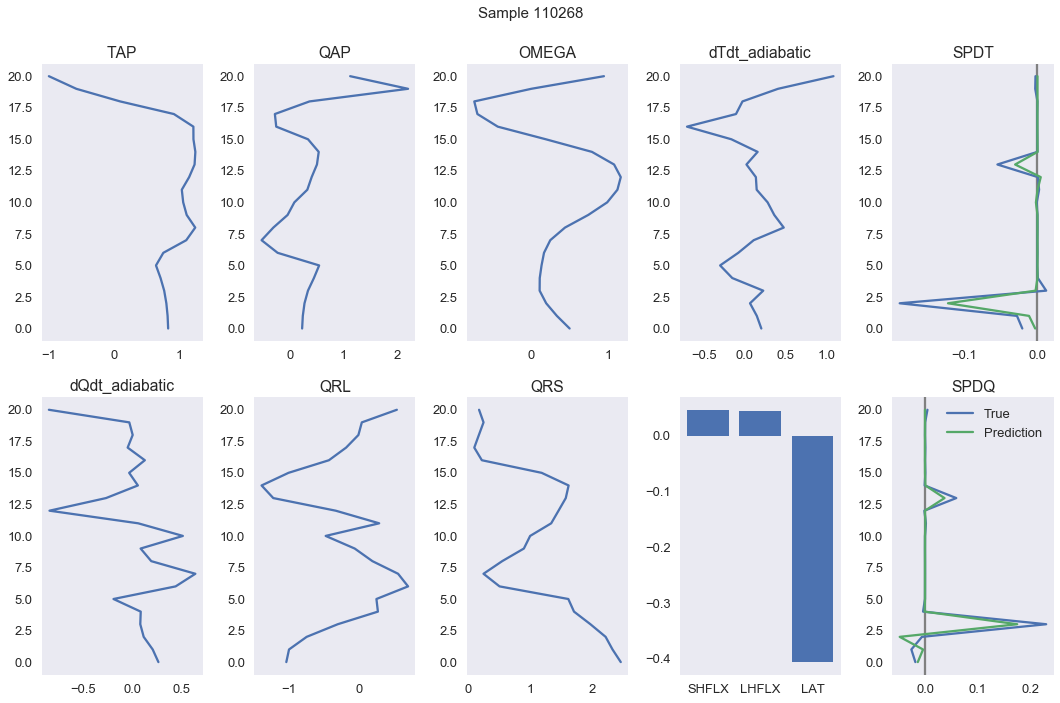

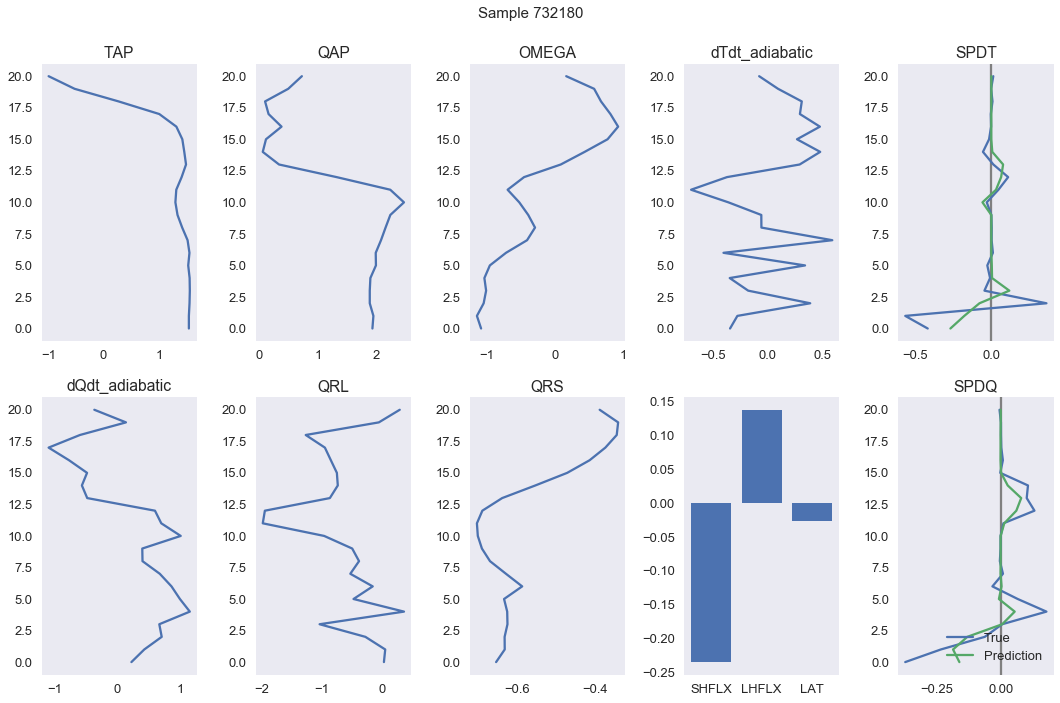

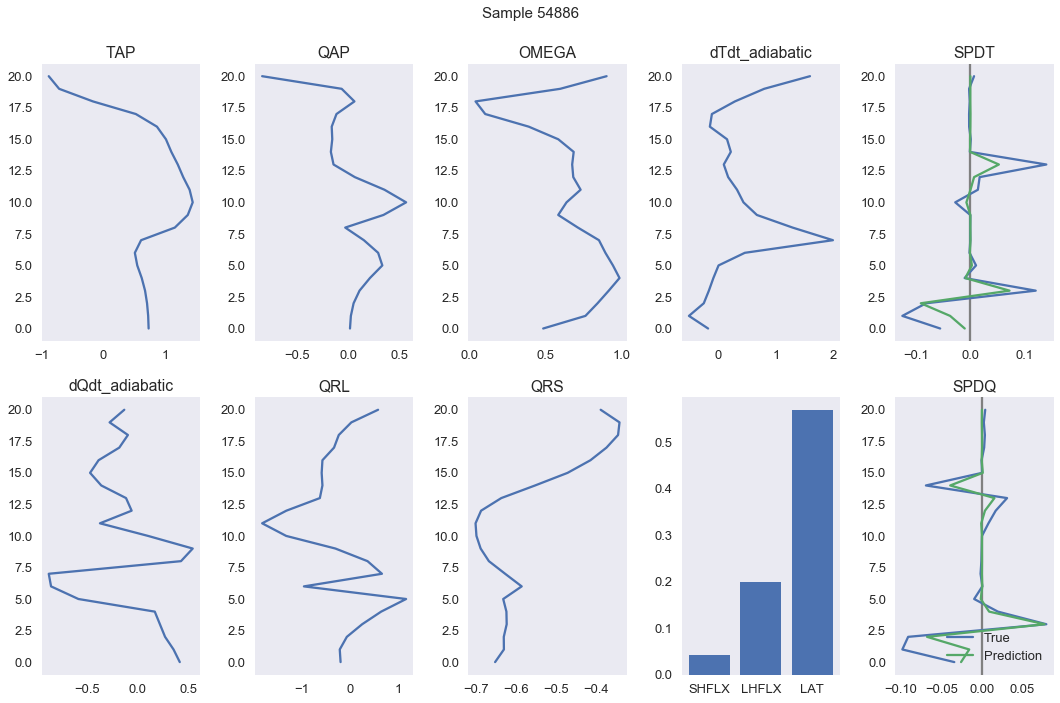

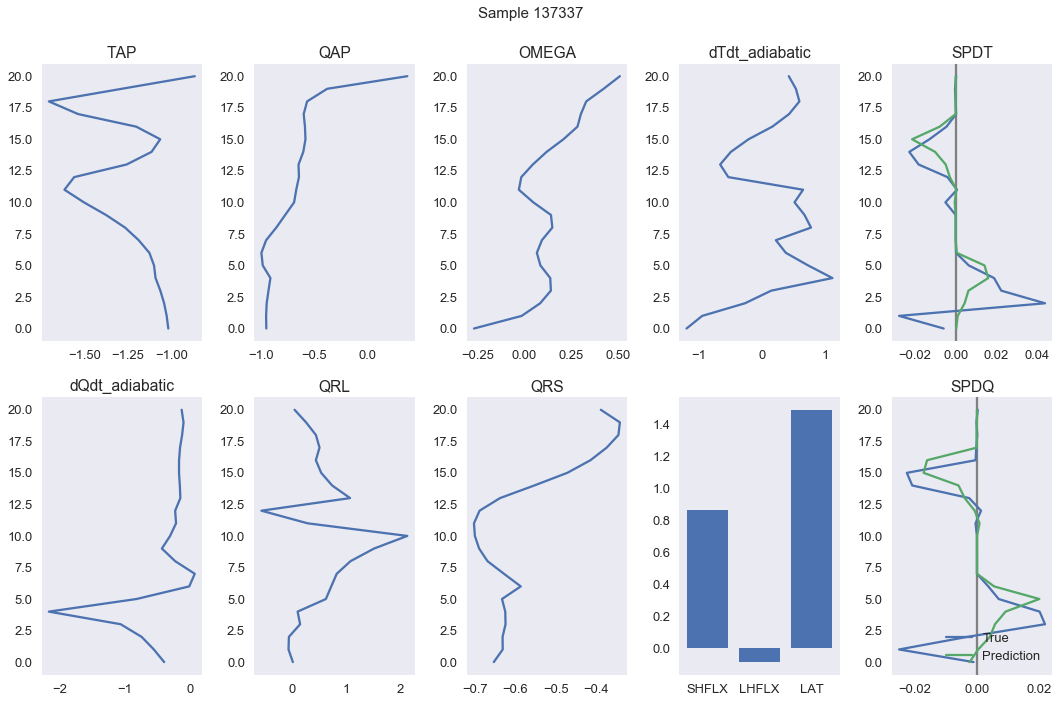

In [108]:
# Plot ten random points
import utils; reload(utils); from utils import *
for i in list(np.random.randint(0, valid_set_rand.features.shape[0], 10)):
    vis_features_targets_from_pred(valid_set_rand.features, 
                                   valid_set_rand.targets, preds_rand,
                                   i, list(valid_set_rand.feature_names), 
                                   valid_set_rand.target_names)

### The same for the by-lon model 

Unfortunately, we cannot pick the exact same samples as for the random split at the moment to compare.

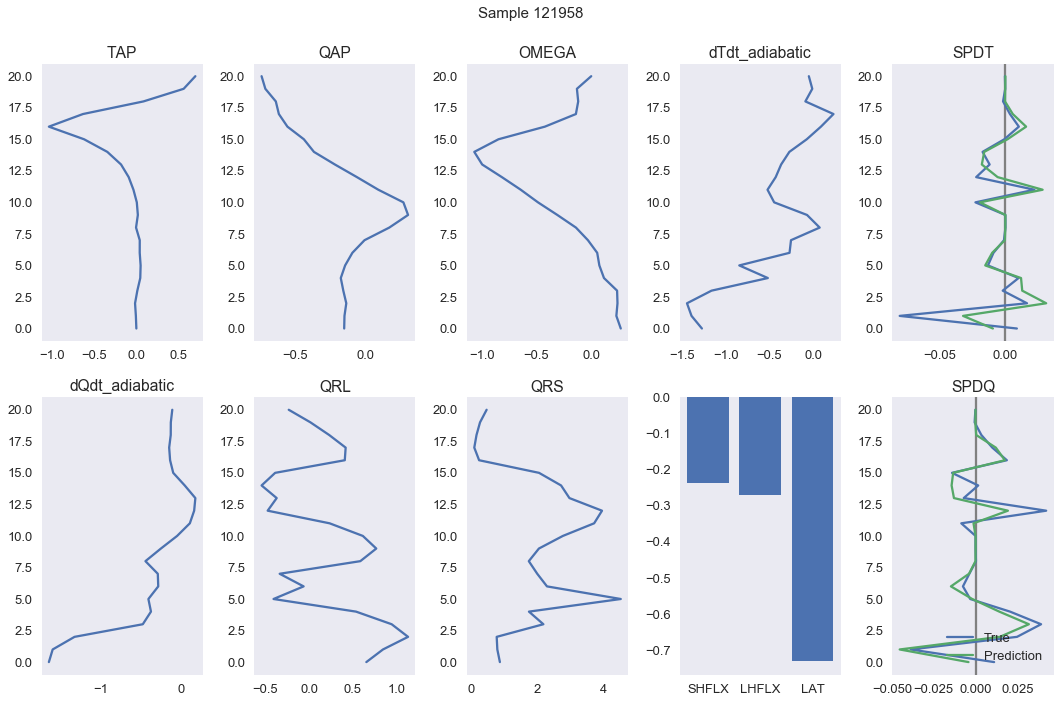

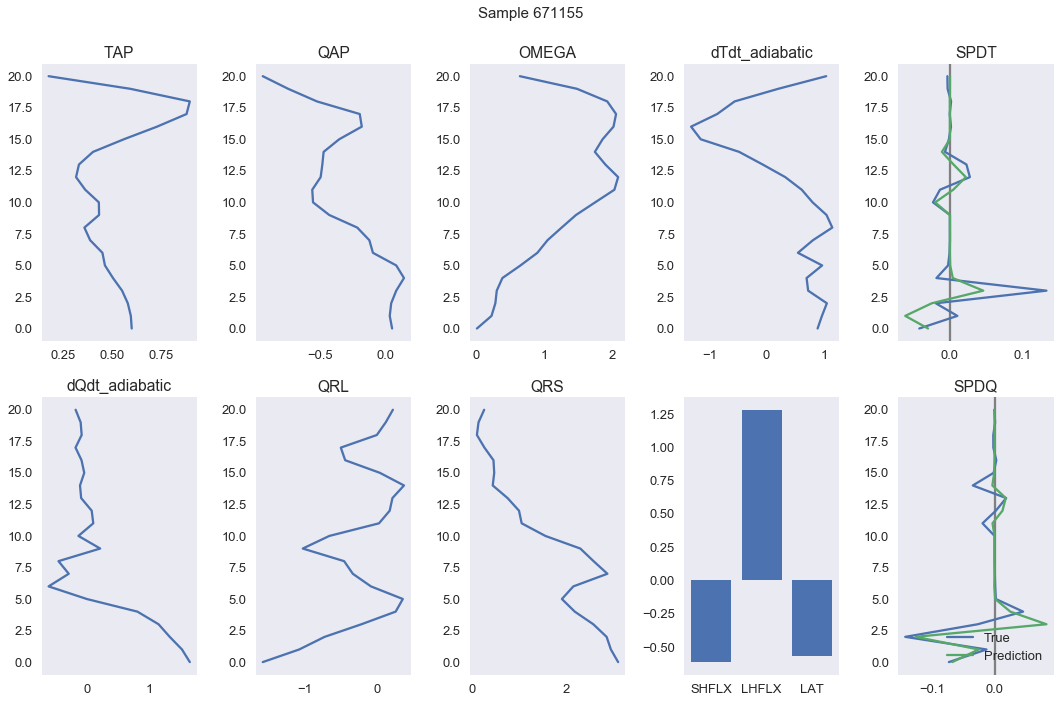

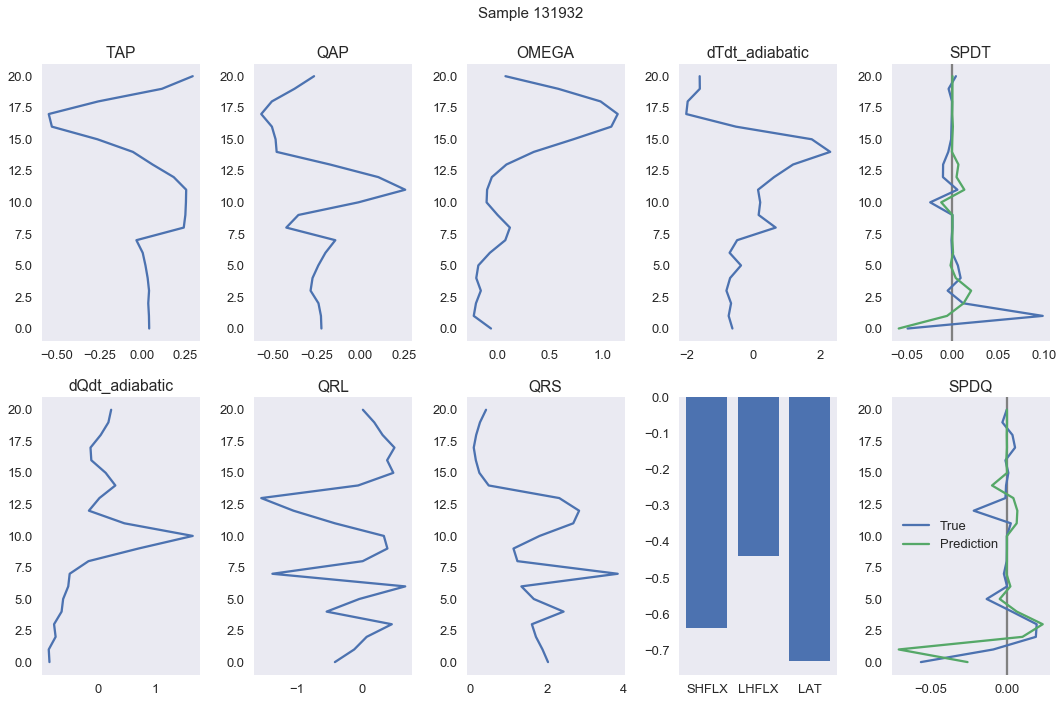

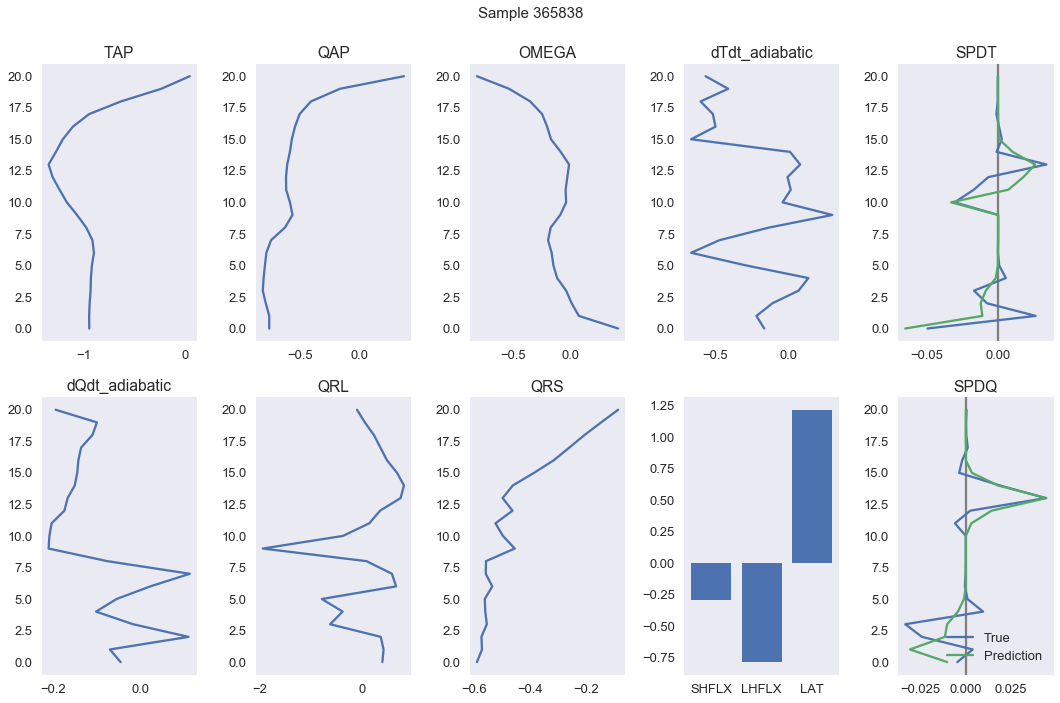

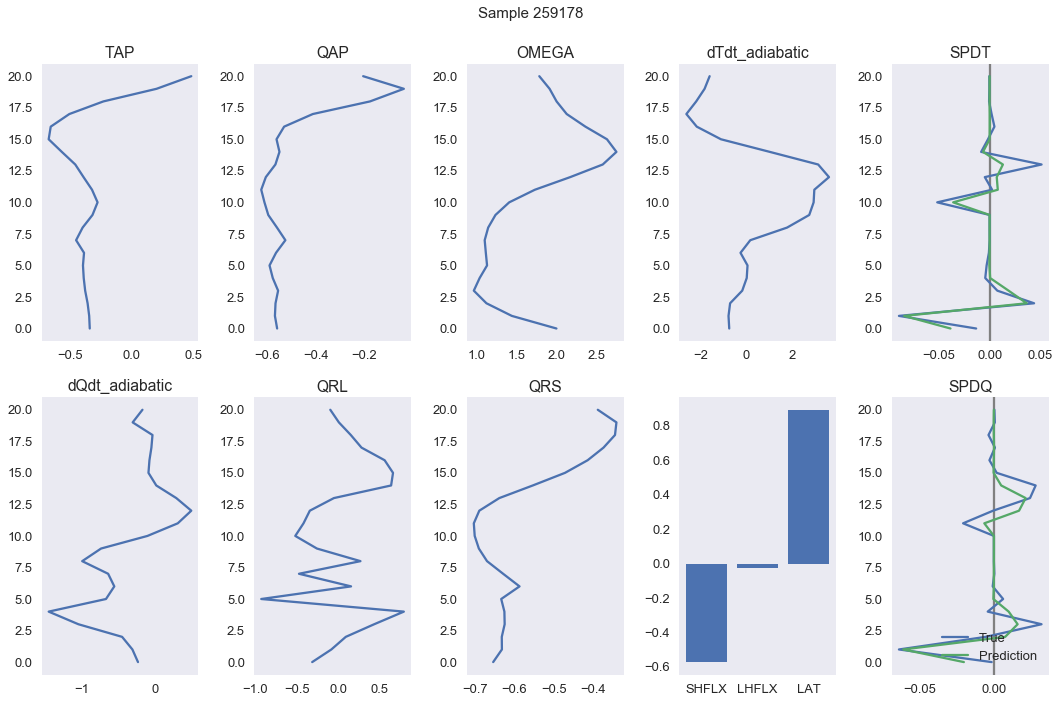

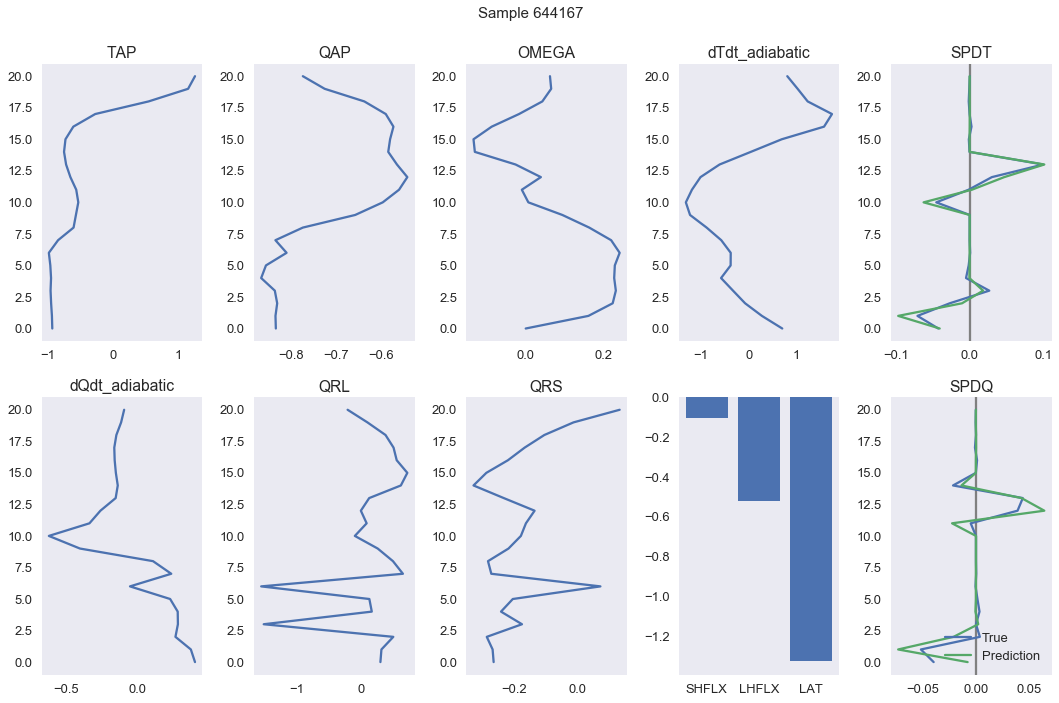

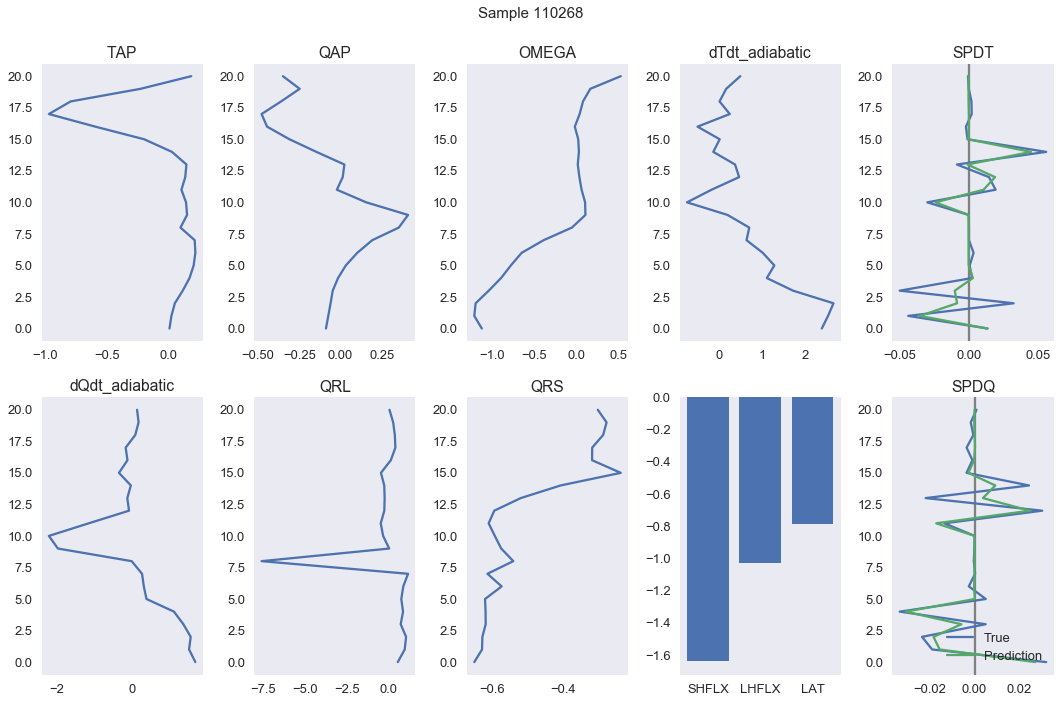

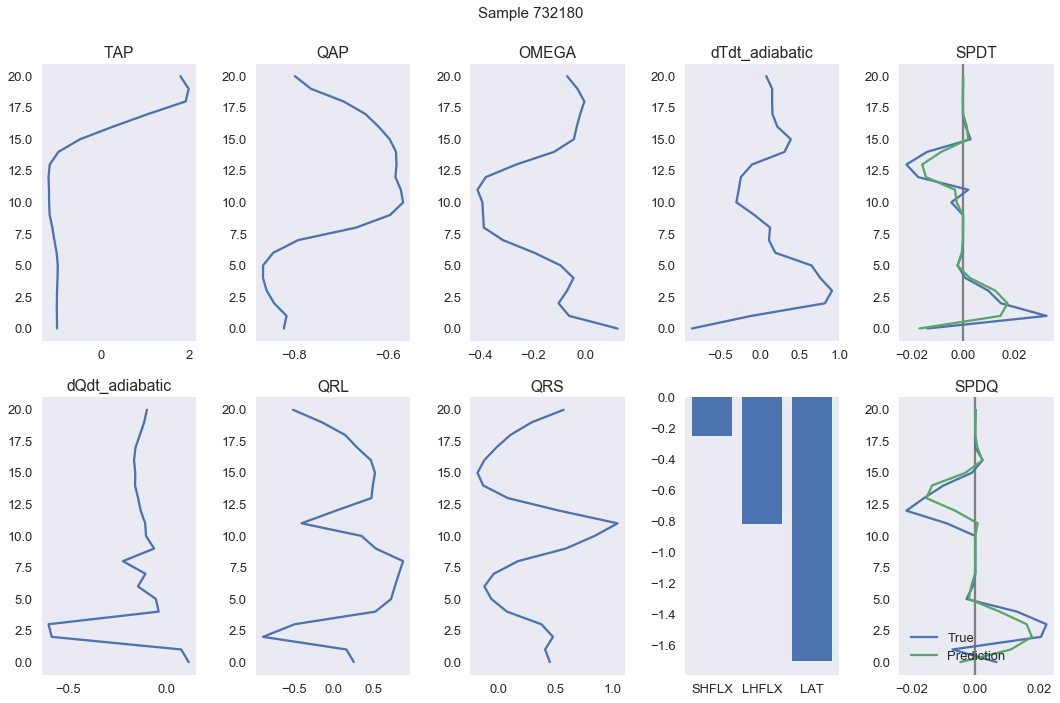

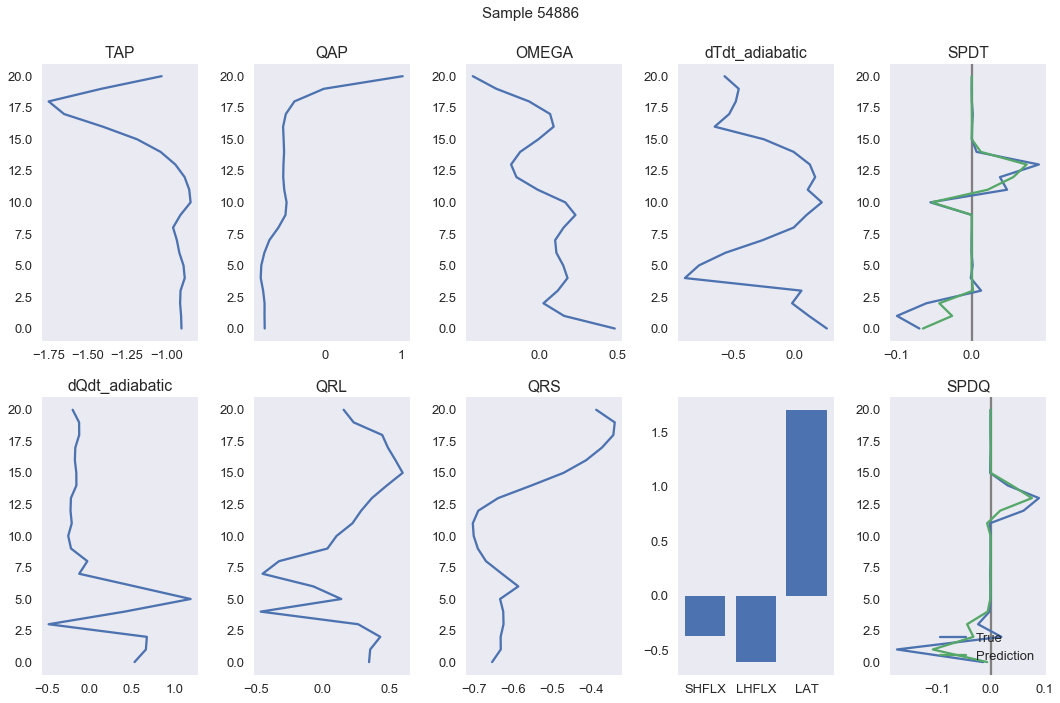

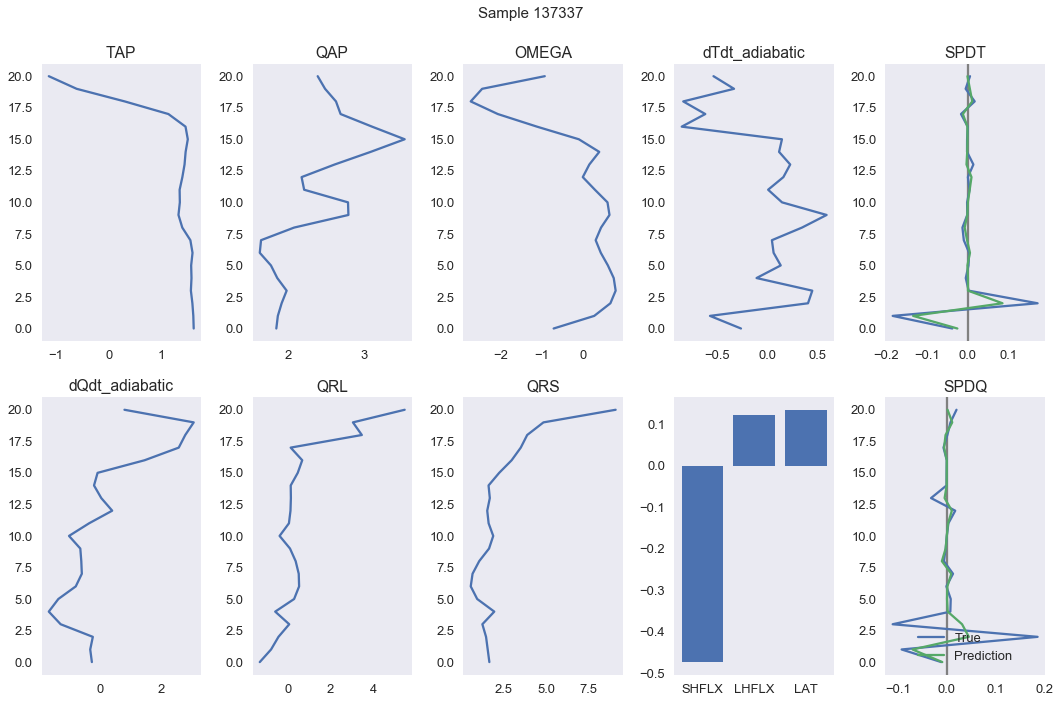

In [109]:
# Plot ten random points
import utils; reload(utils); from utils import *
for i in list(np.random.randint(0, valid_set_lon.features.shape[0], 10)):
    vis_features_targets_from_pred(valid_set_lon.features, 
                                   valid_set_lon.targets, preds_lon,
                                   i, list(valid_set_lon.feature_names), 
                                   valid_set_lon.target_names)

Note that these are the validation set predictions on data that the model has never seem for training. The predictions look pretty good most of the time, which is really cool :)

### Some spatial visualization

Plot some x-y and x-z slices. X-Y here refers to Lon-Lat. We are taking the validation longitude slice here. X-Z refers to longitude-height slices.

#### X-Y Slices

In [131]:
# Reshape the targets and predictions from [sample, feature] to [date, time, lat, lon, feature]
targets_re = np.reshape(valid_set_lon.targets, (12, 47, 64, 26, 42))
preds_re = np.reshape(preds_lon, (12, 47, 64, 26, 42))

In [132]:
valid_set_lon.target_names

['SPDT', 'SPDQ']

In [195]:
def plot_xy(targets, preds, idate, itime, ilev):
    fig, axes = plt.subplots(1, 4, figsize=(15,8))
    range_spdt = np.max(np.abs(targets[idate, itime, :, :, ilev]))
    range_spdq = np.max(np.abs(targets[idate, itime, :, :, ilev+21]))
    # Target SPDT
    I = axes[0].imshow(targets[idate, itime, :, :, ilev],
                       vmin=-range_spdt, vmax=range_spdt, cmap='bwr')
    axes[0].set_title('Target SPDT')
    fig.colorbar(I, ax=axes[0], shrink=0.4)
    # Pred SPDT
    I = axes[1].imshow(preds[idate, itime, :, :, ilev],
                       vmin=-range_spdt, vmax=range_spdt, cmap='bwr')
    axes[1].set_title('Predicted SPDT')
    fig.colorbar(I, ax=axes[1], shrink=0.4)
    # Target SPDQ
    I = axes[2].imshow(targets[idate, itime, :, :, ilev + 21],
                       vmin=-range_spdq, vmax=range_spdq, cmap='bwr')
    axes[2].set_title('Target SPDQ')
    fig.colorbar(I, ax=axes[2], shrink=0.4)
    # Pred SPDQ
    I = axes[3].imshow(preds[idate, itime, :, :, ilev + 21],
                       vmin=-range_spdq, vmax=range_spdq, cmap='bwr')
    axes[3].set_title('Predicted SPDQ')
    fig.colorbar(I, ax=axes[3], shrink=0.4)
    plt.suptitle('Level %i' % ilev, fontsize=15)
    plt.tight_layout()
    plt.show()

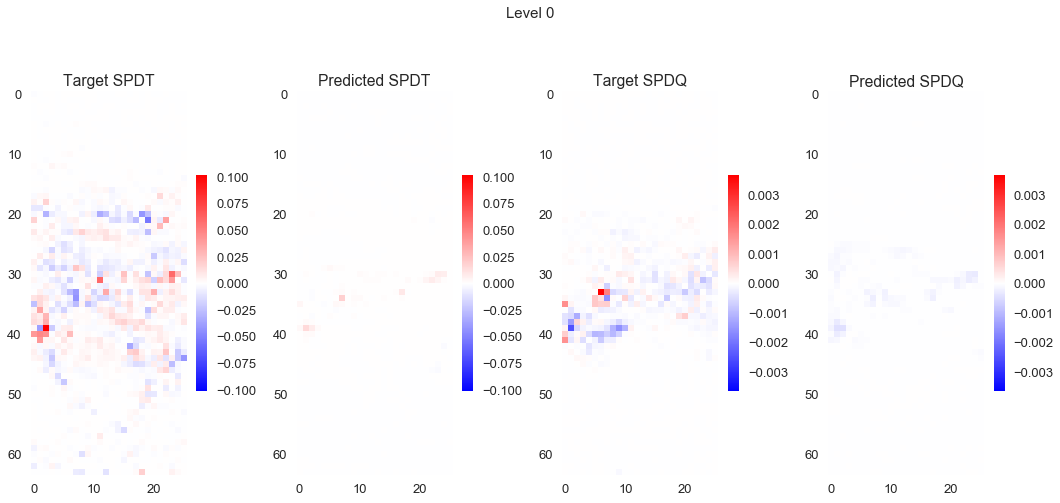

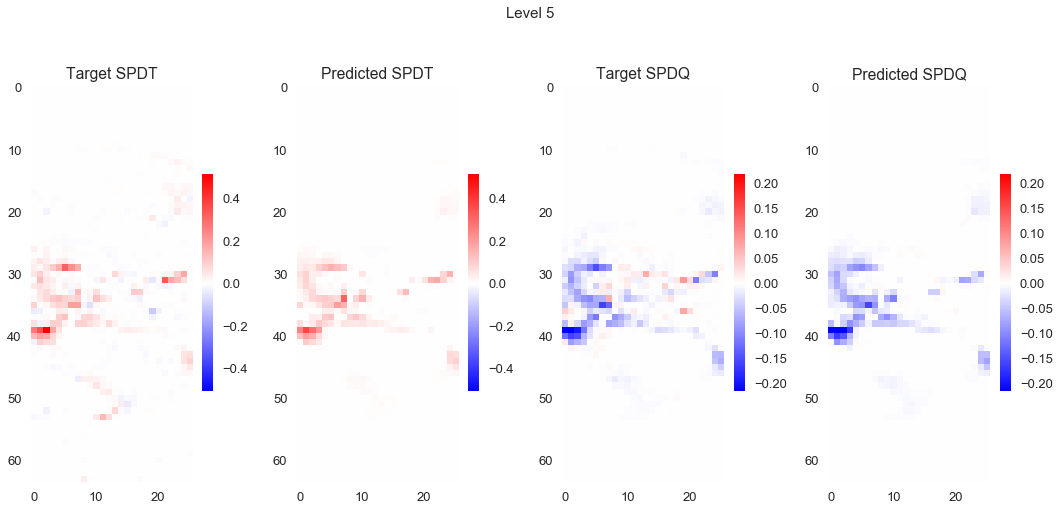

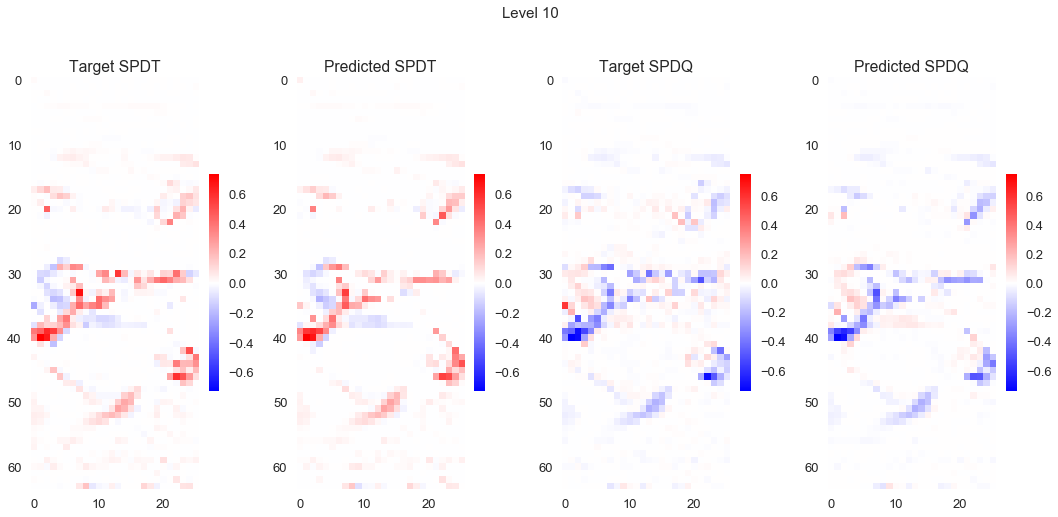

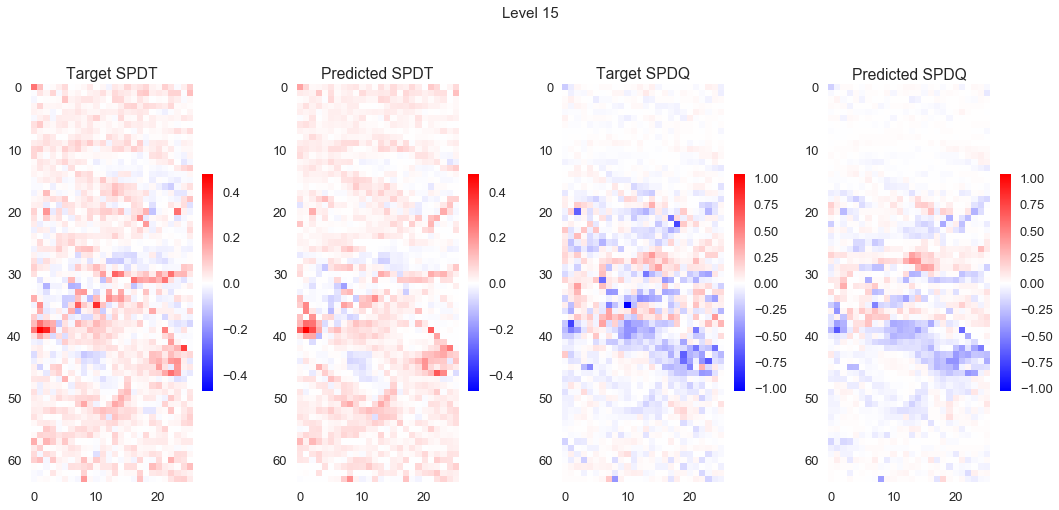

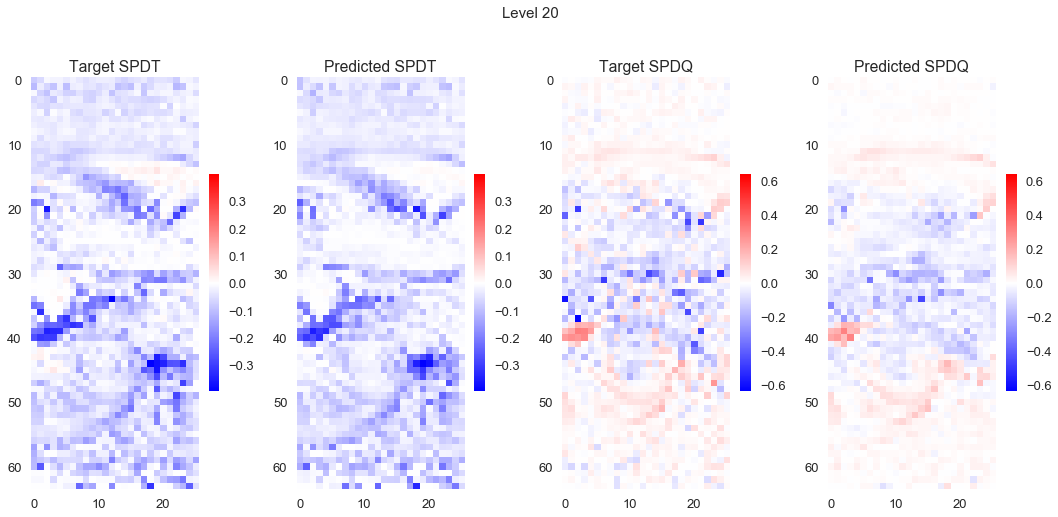

In [196]:
for lev in [0, 5, 10, 15, 20]:
    plot_xy(targets_re, preds_re, 6, 24, lev)

#### Y-Z slices

In [208]:
def plot_yz(targets, preds, idate, itime, ilon):
    fig, axes = plt.subplots(2, 2, figsize=(13,7))
    range_spdt = np.max(np.abs(targets[idate, itime, :, ilon, :21]))
    range_spdq = np.max(np.abs(targets[idate, itime, :, ilon, 21:]))
    # Target SPDT
    I = axes[0, 0].imshow(targets[idate, itime, :, ilon, :21].T,
                       vmin=-range_spdt, vmax=range_spdt, cmap='bwr')
    axes[0, 0].set_title('Target SPDT')
    fig.colorbar(I, ax=axes[0, 0], shrink=0.4)
    # Pred SPDT
    I = axes[1, 0].imshow(preds[idate, itime, :, ilon, :21].T,
                       vmin=-range_spdt, vmax=range_spdt, cmap='bwr')
    axes[1, 0].set_title('Predicted SPDT')
    fig.colorbar(I, ax=axes[1, 0], shrink=0.4)
    # Target SPDQ
    I = axes[0, 1].imshow(targets[idate, itime, :, ilon, 21:].T,
                       vmin=-range_spdq, vmax=range_spdq, cmap='bwr')
    axes[0, 1].set_title('Target SPDQ')
    fig.colorbar(I, ax=axes[0, 1], shrink=0.4)
    # Pred SPDQ
    I = axes[1, 1].imshow(preds[idate, itime, :, ilon, 21:].T,
                       vmin=-range_spdq, vmax=range_spdq, cmap='bwr')
    axes[1, 1].set_title('Predicted SPDQ')
    fig.colorbar(I, ax=axes[1, 1], shrink=0.4)
    plt.tight_layout()
    plt.show()

Month: 2


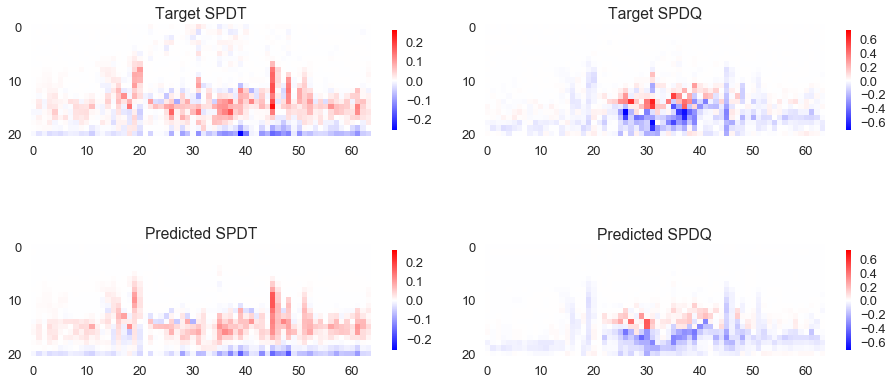

Month: 4


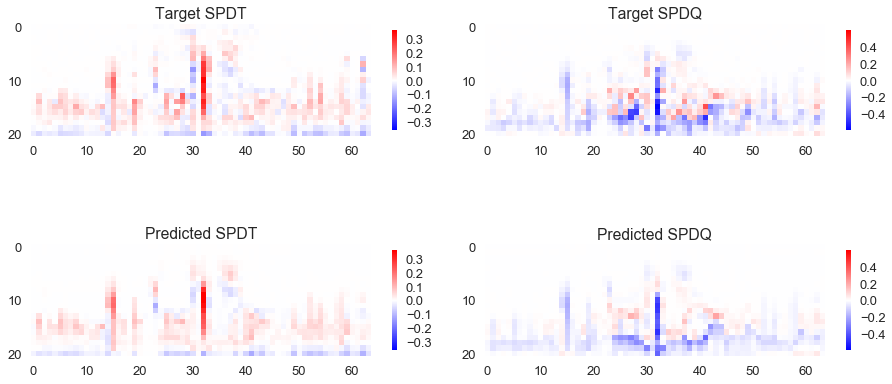

Month: 6


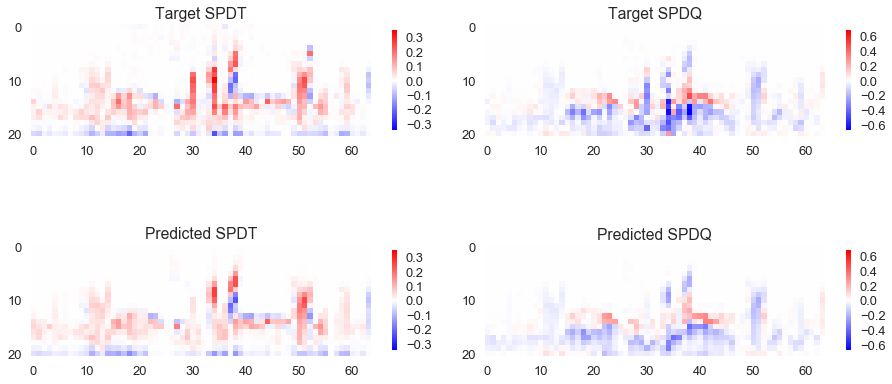

Month: 8


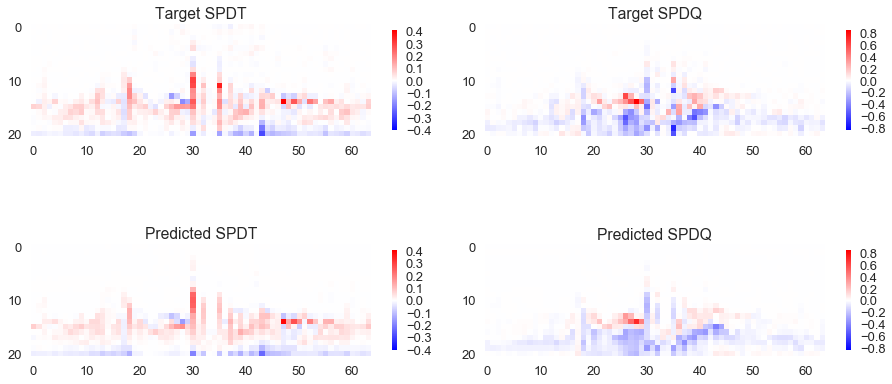

In [213]:
for idate in [2, 4, 6, 8]:
    print('Month:', idate)
    plot_yz(targets_re, preds_re, idate, 0, 10)

### Trying to find biases

In [214]:
error = preds_re - targets_re

In [216]:
np.mean(error), np.mean(np.abs(error)), np.std(preds_re), np.std(targets_re)

(6.8926216e-05, 0.014474269, 0.051991295, 0.064702518)

The mean bias is very small. But there is systematically less variability in the predictions compared to the real data and the mean absolute error is not that small compared to the standard deviation. Maybe we can get some more insight...

In [217]:
error.shape

(12, 47, 64, 26, 42)

In [229]:
# Get bias by averaging over dates and times
bias = np.mean(error, axis=(0, 1))
# Get variability of real data
std = np.std(targets_re, axis=(0, 1))

#### X-Y biases

In [255]:
def plot_bias_xy(bias, std, ilev):
    fig, axes = plt.subplots(1, 4, figsize=(15,8))
    range_spdt = np.max(np.abs(bias[:, :, ilev]))
    range_spdq = np.max(np.abs(bias[:, :, ilev+21]))
    # Bias SPDT
    I = axes[0].imshow(bias[:, :, ilev],
                       vmin=-range_spdt, vmax=range_spdt, cmap='bwr')
    axes[0].set_title('Bias SPDT')
    fig.colorbar(I, ax=axes[0], shrink=0.4)
    # Rel Bias SPDT
    I = axes[1].imshow(bias[:, :, ilev] / std[:, :, ilev],
                       vmin=-0.5, vmax=0.5, cmap='bwr')
    axes[1].set_title('Rel bias SPDT')
    fig.colorbar(I, ax=axes[1], shrink=0.4)
    # Bias SPDQ
    I = axes[2].imshow(bias[:, :, ilev+21],
                       vmin=-range_spdq, vmax=range_spdq, cmap='bwr')
    axes[2].set_title('Bias SPDQ')
    fig.colorbar(I, ax=axes[2], shrink=0.4)
    # Rel Bias SPDQ
    I = axes[3].imshow(bias[:, :, ilev+21] / std[:, :, ilev+21],
                       vmin=-0.5, vmax=0.5, cmap='bwr')
    axes[3].set_title('Rel bias SPDQ')
    fig.colorbar(I, ax=axes[3], shrink=0.4)
    plt.suptitle('Level %i' % ilev, fontsize=15)
    plt.tight_layout()
    plt.show()

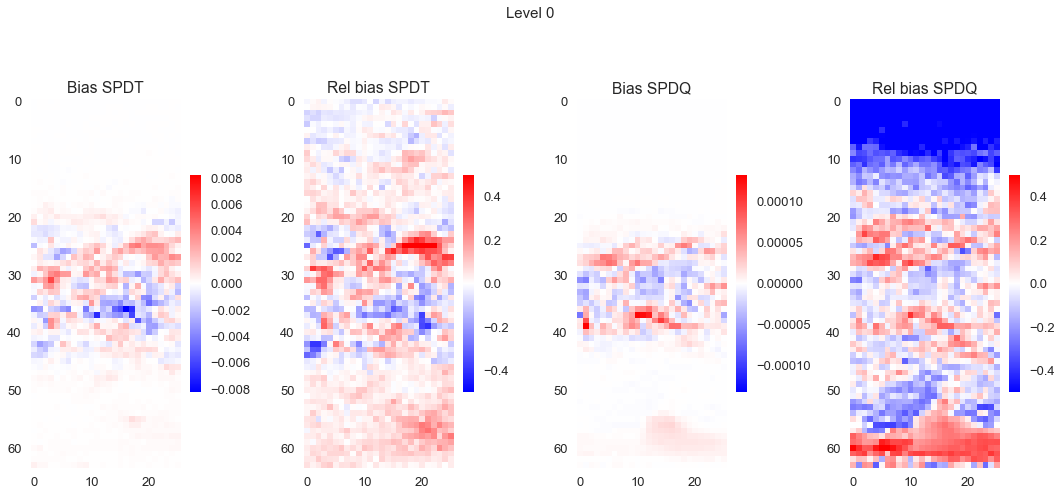

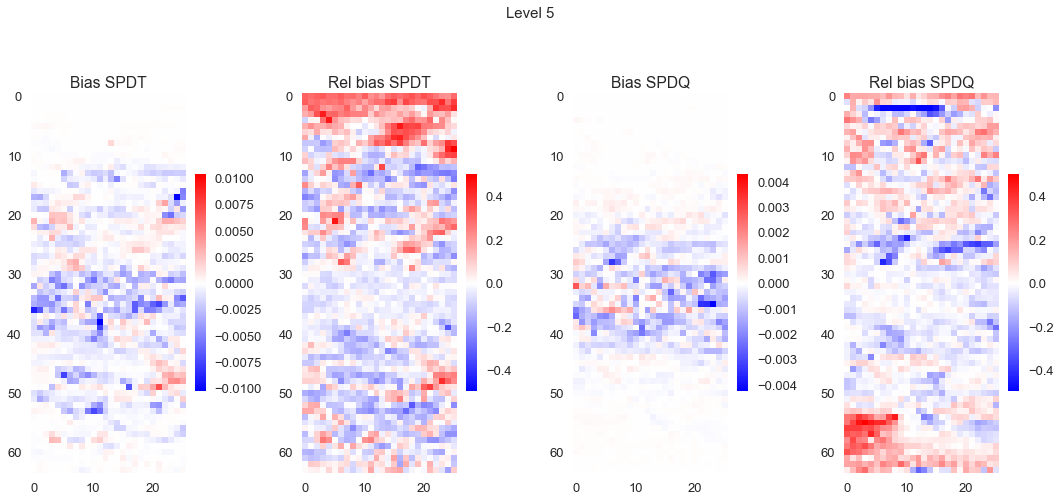

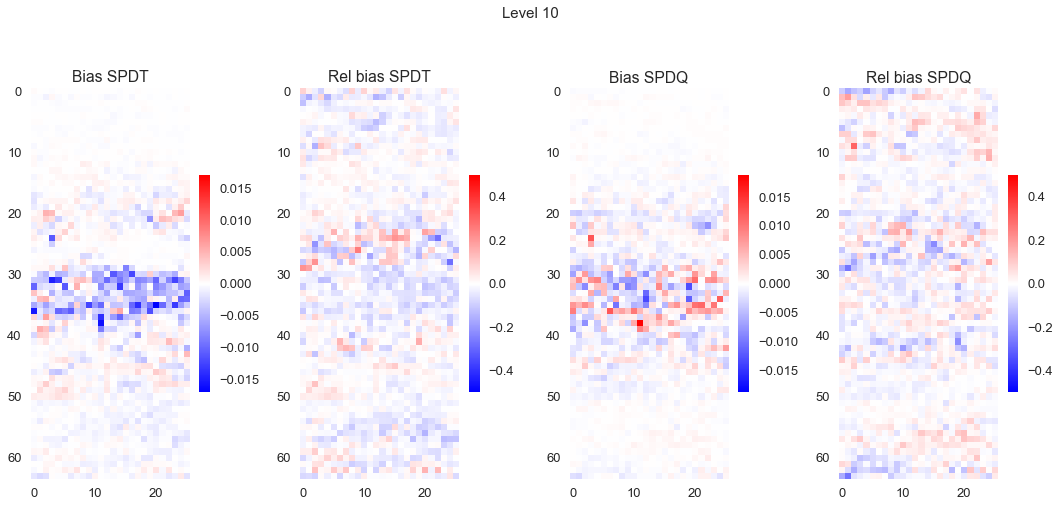

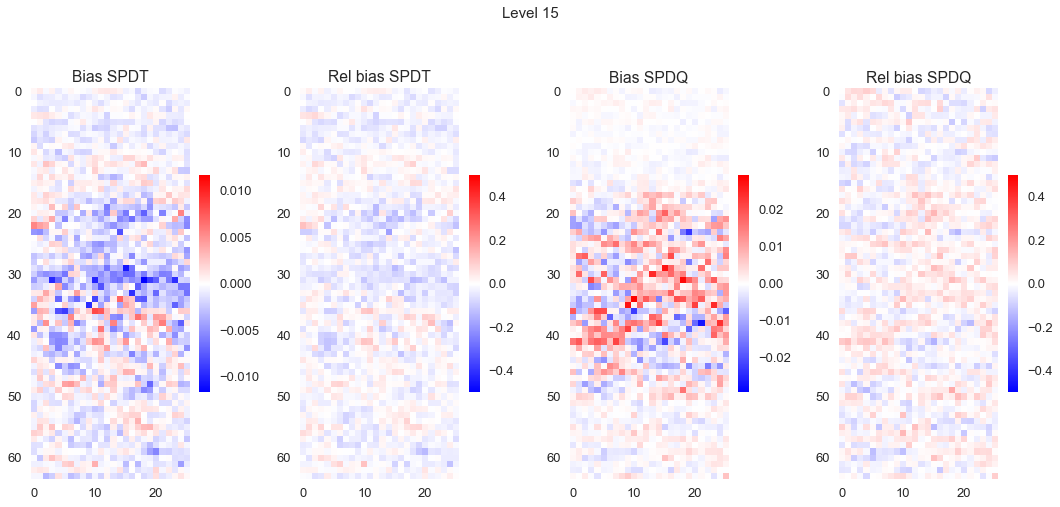

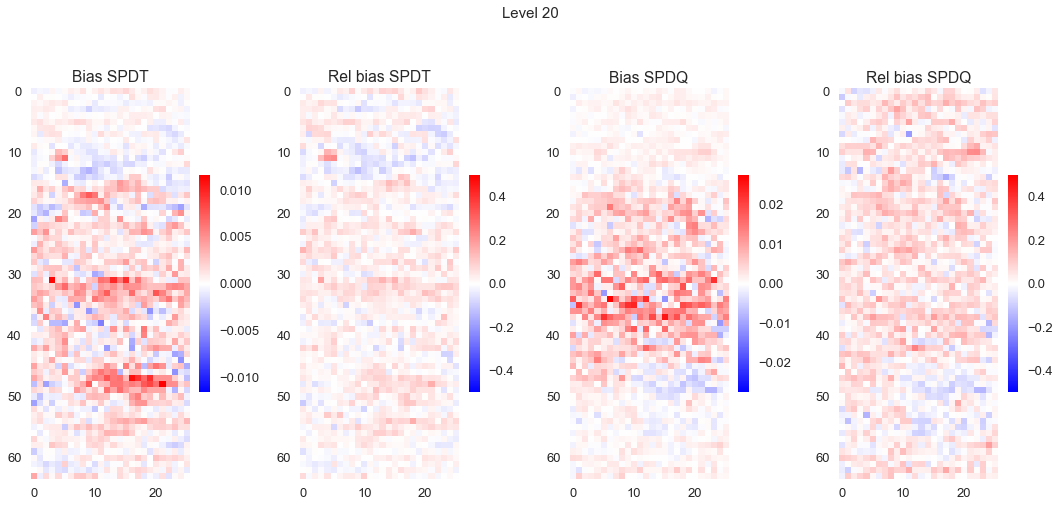

In [256]:
for lev in [0, 5, 10, 15, 20]:
    plot_bias_xy(bias, std, lev)

#### X-Z biases
Since the biases are relatively constant with longitude we can just take the mean over all longitudes.

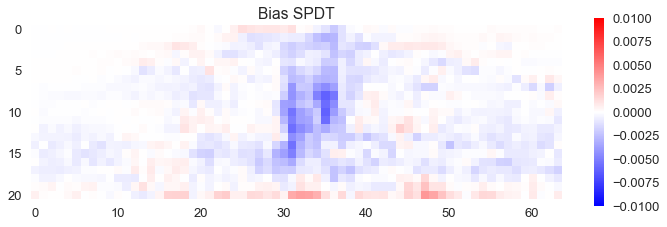

In [258]:
plt.imshow(np.mean(bias[:, :, :21], axis=1).T, cmap='bwr', vmin=-0.01, vmax=0.01)
plt.colorbar(shrink=0.4)
plt.title('Bias SPDT')
plt.tight_layout(); plt.show()

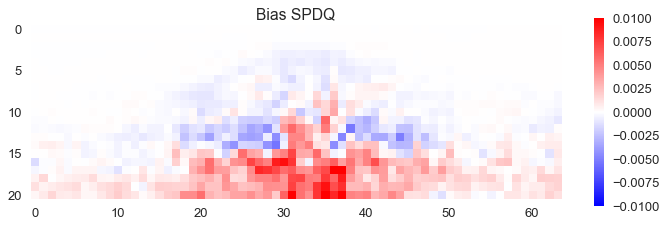

In [260]:
plt.imshow(np.mean(bias[:, :, 21:], axis=1).T, cmap='bwr', vmin=-0.01, vmax=0.01)
plt.colorbar(shrink=0.4)
plt.title('Bias SPDQ')
plt.tight_layout(); plt.show()

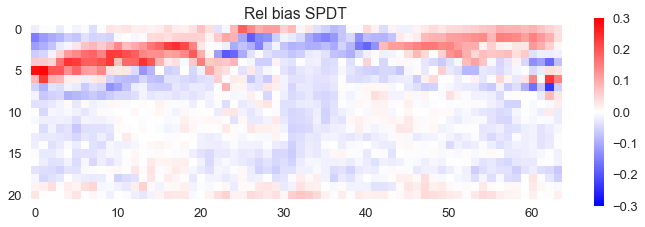

In [262]:
plt.imshow(np.mean(bias[:, :, :21]/std[:, :, :21], axis=1).T, cmap='bwr', vmin=-0.3, vmax=0.3)
plt.colorbar(shrink=0.4)
plt.title('Rel bias SPDT')
plt.tight_layout(); plt.show()

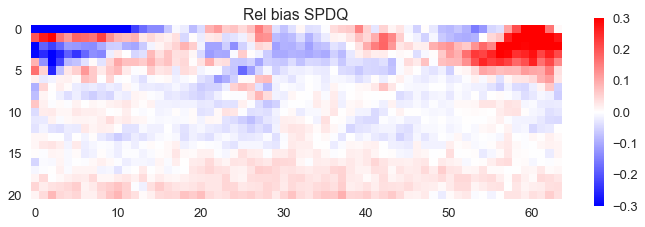

In [263]:
plt.imshow(np.mean(bias[:, :, 21:]/std[:, :, 21:], axis=1).T, cmap='bwr', vmin=-0.3, vmax=0.3)
plt.colorbar(shrink=0.4)
plt.title('Rel bias SPDQ')
plt.tight_layout(); plt.show()

It seems there is definitely some systematic biases. I am not sure how much of this has to do with the small sample size (12 days) and the fact that I am splitting by longitude. A bigger data set where we can split by year would probably be more significant.

### An attempt to check whether the neural net is doing reasonable things

This is just an idea I had to check whether the network predictions are reasonable. For a region in the tropics, we will cluster the input features and then compare the true outcomes and the network predictions for each of the clusters. The range of output values should give us an idea whether the network does a good job.

In [264]:
from sklearn.cluster import KMeans

In [265]:
# Reshape features
features_re = np.reshape(valid_set_lon.features, (12, 47, 64, 26, 150))

In [269]:
# Pick data only from the tropics
features_trop = features_re[:, :, 30:34, :, :]
targets_trop = targets_re[:, :, 30:34, :, :]
preds_trop = preds_re[:, :, 30:34, :, :]

In [277]:
# Flatten them again
features_trop_flat = np.reshape(features_trop, (-1, 150))
targets_trop_flat = np.reshape(targets_trop, (-1, 42))
preds_trop_flat = np.reshape(preds_trop, (-1, 42))

In [302]:
# normalize the features again for maybe better clustering
ftopflat_norm = (features_trop_flat - np.mean(features_trop_flat, axis=0)) / np.std(features_trop_flat, axis=0)

In [319]:
# Try clustering the features
km = KMeans(max_iter=100, n_clusters=5, n_jobs=4)

In [320]:
km.fit(ftopflat_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

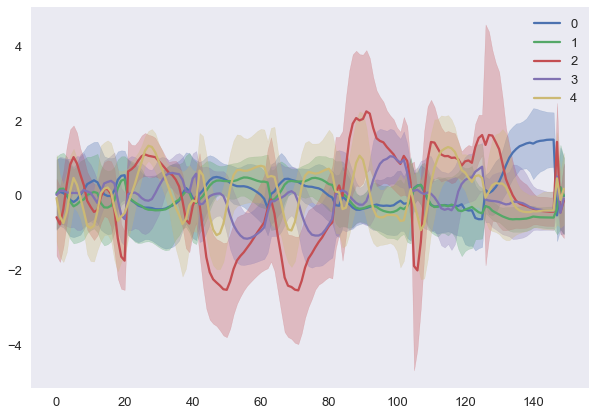

In [321]:
# Visualize clusters
centers = km.cluster_centers_
fig, ax = plt.subplots(1, 1)
colors = ['b', 'g', 'r', 'y', 'purple']
for i in range(centers.shape[0]):
    c = ax._get_lines.get_next_color()
    # compute means
    cluster_idxs = km.labels_ == i
    cluster_std = np.std(ftopflat_norm[cluster_idxs, :], axis=0)
    plt.plot(centers[i], label=str(i), color=c)
    plt.fill_between(range(centers[i].shape[0]), centers[i]-cluster_std, centers[i]+cluster_std,
                     color=c, alpha =0.3)
plt.legend()

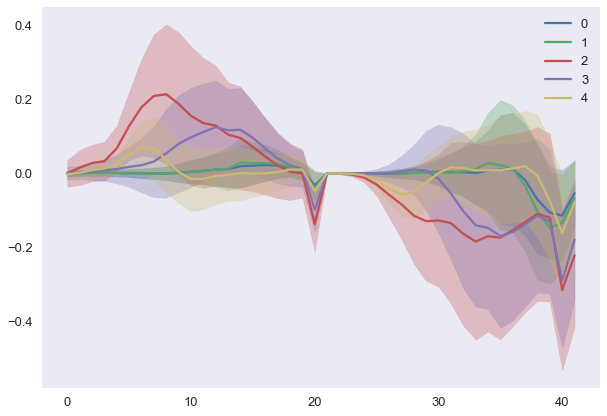

In [322]:
# Visualize clusters, targets
centers = km.cluster_centers_
fig, ax = plt.subplots(1, 1)
for i in range(centers.shape[0]):
    c = ax._get_lines.get_next_color()
    # compute means
    cluster_idxs = km.labels_ == i
    cluster_mean = np.mean(targets_trop_flat[cluster_idxs, :], axis=0)
    cluster_std = np.std(targets_trop_flat[cluster_idxs, :], axis=0)
    plt.plot(cluster_mean, label=str(i), color=c)
    plt.fill_between(range(cluster_mean.shape[0]), cluster_mean-cluster_std, cluster_mean+cluster_std,
                     color=c, alpha =0.3)
plt.legend()

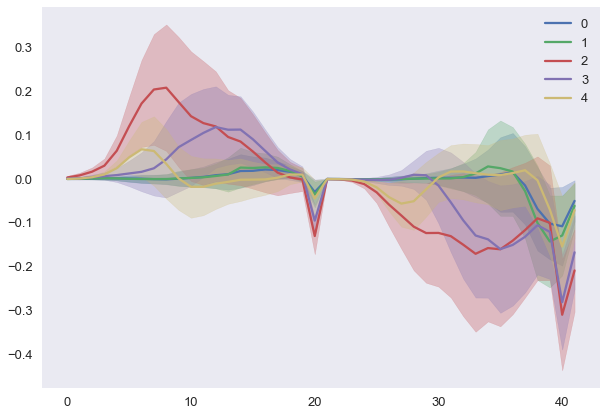

In [323]:
# Visualize clusters, preds
centers = km.cluster_centers_
fig, ax = plt.subplots(1, 1)
for i in range(centers.shape[0]):
    c = ax._get_lines.get_next_color()
    # compute means
    cluster_idxs = km.labels_ == i
    cluster_mean = np.mean(preds_trop_flat[cluster_idxs, :], axis=0)
    cluster_std = np.std(preds_trop_flat[cluster_idxs, :], axis=0)
    plt.plot(cluster_mean, label=str(i), color=c)
    plt.fill_between(range(cluster_mean.shape[0]), cluster_mean-cluster_std, cluster_mean+cluster_std,
                     color=c, alpha =0.3)
plt.legend()

The two plots above look very similar. This basically means that for all of the clusters the output range of the network corresponds with the true range of outcomes. Finally let's look at the min and max to check for outliers

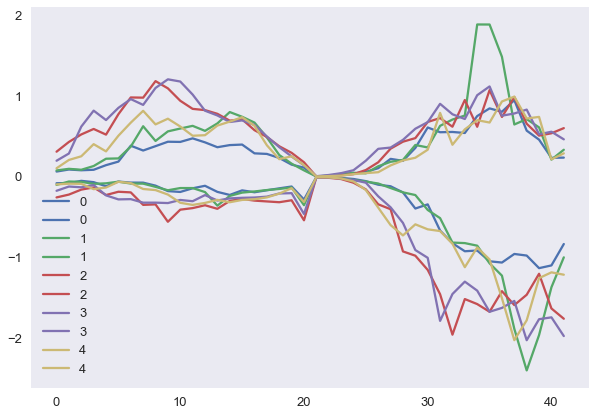

In [324]:
# Visualize clusters, targets
centers = km.cluster_centers_
fig, ax = plt.subplots(1, 1)
for i in range(centers.shape[0]):
    c = ax._get_lines.get_next_color()
    # compute means
    cluster_idxs = km.labels_ == i
    cluster_min = np.min(targets_trop_flat[cluster_idxs, :], axis=0)
    cluster_max = np.max(targets_trop_flat[cluster_idxs, :], axis=0)
    plt.plot(cluster_min, label=str(i), color=c)
    plt.plot(cluster_max, color=c)
plt.legend()

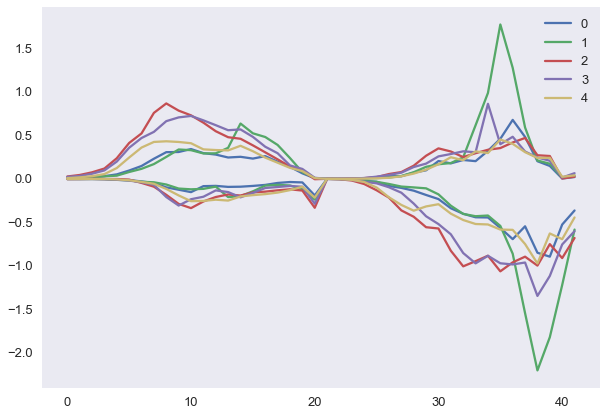

In [325]:
# Visualize clusters, preds
centers = km.cluster_centers_
fig, ax = plt.subplots(1, 1)
for i in range(centers.shape[0]):
    c = ax._get_lines.get_next_color()
    # compute means
    cluster_idxs = km.labels_ == i
    cluster_min = np.min(preds_trop_flat[cluster_idxs, :], axis=0)
    cluster_max = np.max(preds_trop_flat[cluster_idxs, :], axis=0)
    plt.plot(cluster_min, label=str(i), color=c)
    plt.plot(cluster_max, color=c)
plt.legend()

The min-max range of the true outputs are larger. This confirms that the network is not doing anything crazy ever which is nice!

## Low level implementation of network in Python and then Fortran

A basic implementation in python.

In [7]:
from keras.utils.generic_utils import get_custom_objects
metrics_dict = dict([(f.__name__, f) for f in metrics])
get_custom_objects().update(metrics_dict)
model_lon = keras.models.load_model('./models/fc_1024_1024_512_512_by_lon.h5')

In [8]:
model_lon.save_weights('./models/weights_fc_1024_1024_512_512_by_lon.h5')

In [9]:
!ls -lh ./models/weights*

-rw-r--r-- 1 S.Rasp ls-craig 7.7M Nov 15 16:10 ./models/weights_fc_1024_1024_512_512_by_lon.h5


In [48]:
import h5py
f = h5py.File('./models/weights_fc_1024_1024_512_512_by_lon.h5', 'r')

In [49]:
list(f.keys())

['dense_1', 'dense_2', 'dense_3', 'dense_4', 'dense_5']

In [65]:
[n.decode('utf8') for n in f.attrs['layer_names']]

['dense_1', 'dense_2', 'dense_3', 'dense_4', 'dense_5']

In [54]:
list(f.attrs)

['layer_names', 'backend', 'keras_version']

In [55]:
d1 = f['dense_1']

In [56]:
list(d1.attrs)

['weight_names']

In [58]:
d1.attrs['weight_names']

array([b'dense_1_1/kernel:0', b'dense_1_1/bias:0'],
      dtype='|S18')

In [59]:
weight_names = [n.decode('utf8') for n in d1.attrs['weight_names']]

In [60]:
weight_names

['dense_1_1/kernel:0', 'dense_1_1/bias:0']

In [64]:
d1[weight_names[1]][:].shape

(1024,)

The net is 150, 1024, 1024, 512, 512, 42

5 matrices and biases 

In [90]:
def relu(x):
    return np.maximum(0, x)

In [95]:
class Net(object):
    def __init__(self, weight_file):
        # Load weight files from h5 files
        # Mostly copied from keras function load_weights_from_hdf5_group
        # All copy and paste for now, but I couldn't think of a fast way of doing it...
        f = h5py.File(weight_file, 'r')
        layer_names = [n.decode('utf8') for n in f.attrs['layer_names']]
        g_tmp = f[layer_names[0]]
        wn_tmp = [n.decode('utf8') for n in g_tmp.attrs['weight_names']]
        self.w1 = g_tmp[wn_tmp[0]][:]
        self.b1 = g_tmp[wn_tmp[1]][:]
        g_tmp = f[layer_names[1]]
        wn_tmp = [n.decode('utf8') for n in g_tmp.attrs['weight_names']]
        self.w2 = g_tmp[wn_tmp[0]][:]
        self.b2 = g_tmp[wn_tmp[1]][:]
        g_tmp = f[layer_names[2]]
        wn_tmp = [n.decode('utf8') for n in g_tmp.attrs['weight_names']]
        self.w3 = g_tmp[wn_tmp[0]][:]
        self.b3 = g_tmp[wn_tmp[1]][:]
        g_tmp = f[layer_names[3]]
        wn_tmp = [n.decode('utf8') for n in g_tmp.attrs['weight_names']]
        self.w4 = g_tmp[wn_tmp[0]][:]
        self.b4 = g_tmp[wn_tmp[1]][:]
        g_tmp = f[layer_names[4]]
        wn_tmp = [n.decode('utf8') for n in g_tmp.attrs['weight_names']]
        self.w5 = g_tmp[wn_tmp[0]][:]
        self.b5 = g_tmp[wn_tmp[1]][:]
    
    def feed_forward(self, x):
        """150 input
        """
        # 1st layer: 150 --> 1024
        x = relu(np.dot(x, self.w1) + self.b1)
        # 2nd layer: 1024 --> 1024
        x = relu(np.dot(x, self.w2) + self.b2)
        # 3rd layer: 1024 --> 512
        x = relu(np.dot(x, self.w3) + self.b3)
        # 4th layer: 512 --> 512
        x = relu(np.dot(x, self.w4) + self.b4)
        # 5th layer: 512 --> 42
        x = np.dot(x, self.w5) + self.b5
        return x
        

In [96]:
n = Net('./models/weights_fc_1024_1024_512_512_by_lon.h5')

In [98]:
net_test = n.feed_forward(valid_set_lon.features[:5])

In [106]:
np.allclose(net_test, preds_lon[:5])

True